# Visualise correlation between features

## Set up

In [2]:
## import necesarry libraries
import dython
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from collections import Counter
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import train_test_split

In [3]:
## read in data
instances = pd.read_csv('data/ships_extended.csv', index_col=0)

In [4]:
## count occurences of the label
gr_dict = Counter(instances['epithet_gr'])
en_dict = Counter(instances['epithet_en'])

In [5]:
## distinguish features
cat_nom = ['ship', 'number', 'case', 'scansion']
cat_ord = ['book', 'position']
num_dis = ['num_lines', 'difference']
num_con = ['line', 'ratio']

In [6]:
## split data for feature engineering
X_train, X_test, y_train, t_test = train_test_split(instances.drop(['epithet_gr', 'epithet_en', 'clause'], axis=1), instances['epithet_en'], test_size=0.2, random_state=20016)

# Visualisations

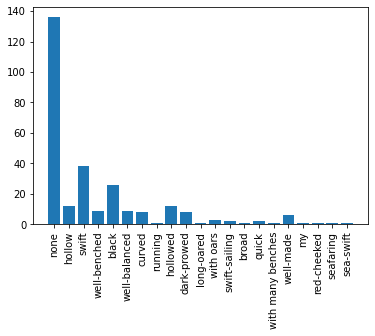

In [7]:
## plot frequency of each epithet
plt.bar(en_dict.keys(), en_dict.values())
plt.xticks(rotation=90)
plt.savefig('plots/epithet_distribution.jpg')
plt.show()

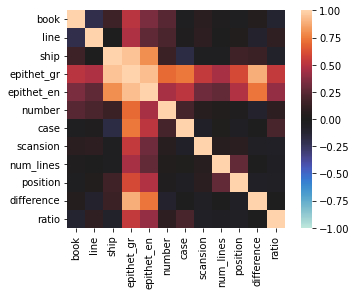

<Figure size 432x288 with 0 Axes>

In [8]:
## correlation between all features
corr_all = dython.nominal.associations(instances.drop(['clause', 'trigrams'], axis=1), annot=False)
plt.savefig('plots/correlation_all.jpg')

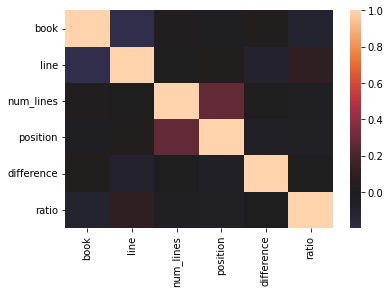

In [9]:
## correlation between numerical features (inc categorical ordinal)
continuous = instances.drop(cat_nom, axis=1)
corr_cont = continuous.corr(method='pearson')
sns.heatmap(corr_cont, cmap=sns.color_palette("icefire", as_cmap=True), center=0)
plt.savefig('plots/numerical_correlations.jpg')

In [10]:
## rank the correlation of each variable with the label
sorted_mat = corr_all['corr'].unstack().sort_values()

## reformat series into data frame
df = pd.DataFrame(data=sorted_mat)
df.rename({0:'correlation'}, axis=1, inplace=True)
df['Index'] = df.index
df = pd.concat(
        [df.drop('Index', axis=1), 
        df['Index'].apply(pd.Series)]
    , axis=1)

## output correlation list
correlations = pd.DataFrame(df[df[0] == 'epithet_en']['correlation'])
correlations = correlations.sort_values(by='correlation', ascending=False)

## remove multi-level indexing
correlations.index = correlations.index.droplevel(0)

correlations = correlations.drop('epithet_en')
correlations

,correlation
epithet_gr,0.935932
ship,0.803613
difference,0.729220
case,0.507936
position,0.478300
number,0.458934
ratio,0.405277
book,0.340326
scansion,0.301171
num_lines,0.267010
